<h1> Airbnb Market Analysis Dublin

 By Ben Benarivo 02/28/2023

A new city manager for Airbnb has started in Dublin and wants to better understand:

- what guests are searching for in Dublin,
- which inquiries hosts tend to accept.

Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

- what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
- what other data would be useful to have to deepen the analysis and understanding.

<h2> 1. Import Data from BigQuery

In [1]:
from google.cloud import bigquery
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google_auth_oauthlib import flow

# TODO: Uncomment the line below to set the `launch_browser` variable.
launch_browser = True
#
# The `launch_browser` boolean variable indicates if a local server is used
# as the callback URL in the auth flow. A value of `True` is recommended,
# but a local server does not work if accessing the application remotely,
# such as over SSH or from a remote Jupyter notebook.

appflow = flow.InstalledAppFlow.from_client_secrets_file(
    "client_secret.json", scopes=["https://www.googleapis.com/auth/bigquery"]
)

if launch_browser:
    appflow.run_local_server()
else:
    appflow.run_console()

credentials = appflow.credentials

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=1064719782872-h57jdvksrdd22am5891otdpdee2mfick.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=l3XTP25y3Qyhnq9p4qjwNFr6XA8Sxn&access_type=offline


In [3]:
from google.cloud import bigquery

# TODO: Uncomment the line below to set the `project` variable.
project = 'prime-dogfish-376602'
#
# The `project` variable defines the project to be billed for query
# processing. The user must have the bigquery.jobs.create permission on
# this project to run a query. See:
# https://cloud.google.com/bigquery/docs/access-control#permissions

client = bigquery.Client(project=project, credentials=credentials)

query_string = """ SELECT *
FROM `prime-dogfish-376602.airbnbdublinmarket.Contacts`;
"""

df_contacts = client.query(query_string).to_dataframe()

In [4]:
df_contacts.head(10)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,23439f9d-1bc3-4189-8c0a-4b803da3740a,1076c74d-ca8f-4381-856e-0ef45b9e1692,125ff7c3-e002-4e14-86c3-ce27af0e70b5,2014-10-07 21:17:39+00:00,2014-10-12 17:33:28.0,NULL,NULL,2014-11-10,2014-11-12,1,2
1,23439f9d-1bc3-4189-8c0a-4b803da3740a,4f351532-59dc-4706-898a-0c4d25f1b125,94c2dc52-f0f4-409c-9c3d-af36e152f9d9,2014-10-07 21:13:32+00:00,2014-10-07 21:23:58.0,NULL,NULL,2014-11-10,2014-11-12,1,2
2,23439f9d-1bc3-4189-8c0a-4b803da3740a,becd48ad-623e-4821-9538-e9d8f84f1cac,d6763e59-b5ea-406f-8fbb-4cf4d597f332,2014-10-07 21:02:46+00:00,2014-10-07 21:17:57.0,2014-10-13 21:06:33.0,2014-10-13 21:06:33.0,2014-11-10,2014-11-12,1,6
3,7629ea29-ff0a-429b-982f-39f4a0da6eb5,28980988-2a4e-4516-bf62-5c47b3ba62b2,2a6efb76-ce28-4811-8f01-b9cdc0be5f2a,2014-09-29 16:29:22+00:00,2014-09-29 18:25:11.0,2014-09-29 18:25:17.0,NULL,2014-11-10,2014-11-30,1,5
4,8eed188c-02d7-455d-9c90-aba0f391d8d2,8ccb3e6b-7b90-4de7-ac10-1e8f35824d23,09d5efd5-381b-460c-8df2-47e9a4d9c5dd,2014-10-04 15:46:14+00:00,2014-10-04 15:52:49.0,2014-10-04 15:52:49.0,2014-10-05 05:01:41.0,2014-11-10,2014-11-13,1,19
5,97276eb6-a988-46c9-9c62-2cd2be97fad4,882d1e82-a229-470b-ac01-2e417e7f2daa,8f1c98b8-0f35-4258-8dc7-3743106a4455,2014-10-16 21:46:38+00:00,2014-10-17 01:04:31.0,NULL,NULL,2014-11-10,2014-11-12,1,4
6,9f8eebb9-95e9-493b-b6df-b75e531b7876,cb6e8d00-6a32-4ade-bd12-3e6dce9784f3,487a7671-c5d4-467d-bdb4-797f31980a2b,2014-10-12 12:29:09+00:00,2014-10-12 17:24:17.0,2014-10-12 17:24:17.0,2014-10-14 11:27:16.0,2014-11-10,2014-12-19,1,8
7,b5674966-7390-460f-8dde-c615b8783062,a83f92fb-fcbf-445b-8cb5-516560f50601,746c951e-6861-4b8b-9ee5-1c4fdabec2f8,2014-10-13 03:18:26+00:00,2014-10-13 04:12:59.0,2014-10-13 04:12:59.0,2014-10-13 04:12:59.0,2014-11-10,2014-11-12,1,26
8,02f0a750-34da-4268-94e8-f1a371f0460e,86b39b70-965b-479d-a0b0-719b195acea2,e5dd99cd-ad45-409b-ac13-ab9a576a41a3,2014-10-09 10:10:42+00:00,2014-10-11 10:07:50.0,2014-10-11 20:51:12.0,NULL,2014-11-11,2014-11-19,1,9
9,289f6109-a24b-4880-a6bf-1f3f5e9d551a,6535d260-8062-4089-bc27-8fdf2bcbfb63,98edd793-0138-4853-989e-7d8497cefc60,2014-10-10 17:26:34+00:00,2014-10-10 23:12:34.0,2014-10-10 23:12:40.0,2014-10-10 23:12:40.0,2014-11-11,2014-11-16,1,12


In [5]:
query_string = """ SELECT *
FROM `prime-dogfish-376602.airbnbdublinmarket.Searches`;
"""

df_searches = client.query(query_string).to_dataframe()

<h2> 2. Initial Data Cleaning: Search Data

In this section, we want to:

    1. the type of data in each dataset
    2. correct the data format / type

<h3> 2.a. Update the NULL values

In [6]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    35737 non-null  dbdate
 1   id_user               35737 non-null  object
 2   ds_checkin            35737 non-null  object
 3   ds_checkout           35737 non-null  object
 4   n_searches            35737 non-null  Int64 
 5   n_nights              35737 non-null  object
 6   n_guests_min          35737 non-null  Int64 
 7   n_guests_max          35737 non-null  Int64 
 8   origin_country        35737 non-null  object
 9   filter_price_min      35737 non-null  object
 10  filter_price_max      35737 non-null  object
 11  filter_room_types     16191 non-null  object
 12  filter_neighborhoods  1346 non-null   object
dtypes: Int64(3), dbdate(1), object(9)
memory usage: 3.6+ MB


In [7]:
df_searches.tail(3)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
35734,2014-10-04,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,3,5,16,16,US,NULL,NULL,None,None
35735,2014-10-05,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,2,5,16,16,US,NULL,NULL,None,None
35736,2014-10-03,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-14,2015-09-18,1,4,16,16,US,NULL,NULL,None,None


In [8]:
df_searches.isnull().sum()

ds                          0
id_user                     0
ds_checkin                  0
ds_checkout                 0
n_searches                  0
n_nights                    0
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min            0
filter_price_max            0
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64

There are 'NULL' data that we have to set to None. Because right now the NULL value is taken into account as a string value, as we see above that the number of NULL values are 0 in several columns that actually has 'NULL' data.

In [9]:
df_searches['ds'].loc[df_searches['ds'] == 'NULL']

Series([], Name: ds, dtype: dbdate)

In [10]:
df_searches['id_user'].loc[df_searches['id_user'] == 'NULL']

Series([], Name: id_user, dtype: object)

In [11]:
df_searches['ds_checkin'].loc[df_searches['ds_checkin'] == 'NULL']

0        NULL
1        NULL
2        NULL
3        NULL
4        NULL
         ... 
35678    NULL
35679    NULL
35680    NULL
35681    NULL
35682    NULL
Name: ds_checkin, Length: 11849, dtype: object

In [12]:
df_searches['ds_checkin'].loc[df_searches['ds_checkin'] == 'NULL'] = None

C:\Users\bnriv\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
df_searches['ds_checkin']

0              None
1              None
2              None
3              None
4              None
            ...    
35732    2015-07-17
35733    2015-07-31
35734    2015-09-13
35735    2015-09-13
35736    2015-09-14
Name: ds_checkin, Length: 35737, dtype: object

In [14]:
df_searches['ds_checkout'].loc[df_searches['ds_checkout'] == 'NULL'] = None

In [15]:
df_searches['ds_checkout']

0              None
1              None
2              None
3              None
4              None
            ...    
35732    2015-07-20
35733    2015-08-02
35734    2015-09-18
35735    2015-09-18
35736    2015-09-18
Name: ds_checkout, Length: 35737, dtype: object

In [16]:
df_searches['n_searches'].loc[df_searches['n_searches'] == 'NULL'] = None

In [17]:
df_searches['n_nights'].loc[df_searches['n_nights'] == 'NULL'] = None

C:\Users\bnriv\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df_searches['n_guests_min'].loc[df_searches['n_guests_min'] == 'NULL'] = None

In [19]:
df_searches['n_guests_max'].loc[df_searches['n_guests_max'] == 'NULL'] = None

In [20]:
df_searches['origin_country'].loc[df_searches['origin_country'] == 'NULL'] = None

C:\Users\bnriv\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df_searches['origin_country'].loc[df_searches['origin_country'] == 'NULL'] = None

In [22]:
df_searches['filter_price_min'].loc[df_searches['filter_price_min'] == 'NULL'] = None

In [23]:
df_searches['filter_price_max'].loc[df_searches['filter_price_max'] == 'NULL'] = None

In [24]:
df_searches['filter_room_types'].loc[df_searches['filter_room_types'] == 'NULL'] = None

In [25]:
df_searches['filter_neighborhoods'].loc[df_searches['filter_neighborhoods'] == 'NULL'] = None

In [26]:
df_searches.head(5)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,None,None,1,None,1,1,GB,None,None,None,None
1,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,None,None,1,None,1,1,IE,None,None,None,None
2,2014-10-01,00dbfc14-e378-40c9-b841-28f60275109d,None,None,4,None,1,1,IT,None,None,None,None
3,2014-10-01,00fb5de4-9865-420f-bc85-22521121a1ca,None,None,4,None,1,1,DE,None,None,None,None
4,2014-10-01,01887780-4ede-4e25-9aa6-e0349cd7c0c9,None,None,6,None,1,1,US,None,None,None,None


In [27]:
df_searches.isnull().sum()

ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64

Based on above, we have finished the update for the NULL values

<h3> 2.b. Update the data type

In [28]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    35737 non-null  dbdate
 1   id_user               35737 non-null  object
 2   ds_checkin            23888 non-null  object
 3   ds_checkout           23888 non-null  object
 4   n_searches            35737 non-null  Int64 
 5   n_nights              23888 non-null  object
 6   n_guests_min          35737 non-null  Int64 
 7   n_guests_max          35737 non-null  Int64 
 8   origin_country        35737 non-null  object
 9   filter_price_min      13322 non-null  object
 10  filter_price_max      13322 non-null  object
 11  filter_room_types     16191 non-null  object
 12  filter_neighborhoods  1346 non-null   object
dtypes: Int64(3), dbdate(1), object(9)
memory usage: 3.6+ MB


We need to set the data type of each column correctly

In [29]:
df_searches['ds']= pd.to_datetime(df_searches['ds'])

In [30]:
df_searches.tail(3)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
35734,2014-10-04,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,3,5,16,16,US,None,None,None,None
35735,2014-10-05,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,2,5,16,16,US,None,None,None,None
35736,2014-10-03,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-14,2015-09-18,1,4,16,16,US,None,None,None,None


In [31]:
df_searches['id_user']= df_searches['id_user'].astype('string')

In [32]:
df_searches.tail(3)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
35734,2014-10-04,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,3,5,16,16,US,None,None,None,None
35735,2014-10-05,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,2,5,16,16,US,None,None,None,None
35736,2014-10-03,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-14,2015-09-18,1,4,16,16,US,None,None,None,None


In [33]:
df_searches['ds_checkin']= pd.to_datetime(df_searches['ds_checkin'])

In [34]:
df_searches['ds_checkout']= pd.to_datetime(df_searches['ds_checkout'])

In [35]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  string        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  Int64         
 5   n_nights              23888 non-null  object        
 6   n_guests_min          35737 non-null  Int64         
 7   n_guests_max          35737 non-null  Int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  object        
 10  filter_price_max      13322 non-null  object        
 11  filter_room_types     16191 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
dtypes: Int64(3), dat

In [36]:
df_searches['n_nights']= pd.to_numeric(df_searches['n_nights'])

In [37]:
df_searches['origin_country']= df_searches['origin_country'].astype('string')

In [38]:
df_searches['filter_price_min']= pd.to_numeric(df_searches['filter_price_min'])

In [39]:
df_searches['filter_price_max']= pd.to_numeric(df_searches['filter_price_max'])

In [40]:
df_searches['filter_room_types']= df_searches['filter_room_types'].astype('string')

In [41]:
df_searches['filter_neighborhoods']= df_searches['filter_neighborhoods'].astype('string')

In [42]:
df_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  string        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  Int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  Int64         
 7   n_guests_max          35737 non-null  Int64         
 8   origin_country        35737 non-null  string        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     16191 non-null  string        
 12  filter_neighborhoods  1346 non-null   string        
dtypes: Int64(3), dat

In [43]:
df_searches.tail(5)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
35732,2014-10-01,0b42db7d-a06e-494c-9407-78b040a8f390,2015-07-17,2015-07-20,6,3.0,1,16,GB,NaN,NaN,",Entire home/apt",<NA>
35733,2014-10-06,383cc29e-6ca5-42da-89fb-68fa46754a80,2015-07-31,2015-08-02,1,2.0,16,16,IE,NaN,NaN,<NA>,<NA>
35734,2014-10-04,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,3,5.0,16,16,US,NaN,NaN,<NA>,<NA>
35735,2014-10-05,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-13,2015-09-18,2,5.0,16,16,US,NaN,NaN,<NA>,<NA>
35736,2014-10-03,a5c65d22-0ce8-45a9-a409-fec05ad0f364,2015-09-14,2015-09-18,1,4.0,16,16,US,NaN,NaN,<NA>,<NA>


In [44]:
df_searches.head(5)

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,<NA>,<NA>
1,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,NaN,<NA>,<NA>
2,2014-10-01,00dbfc14-e378-40c9-b841-28f60275109d,NaT,NaT,4,NaN,1,1,IT,NaN,NaN,<NA>,<NA>
3,2014-10-01,00fb5de4-9865-420f-bc85-22521121a1ca,NaT,NaT,4,NaN,1,1,DE,NaN,NaN,<NA>,<NA>
4,2014-10-01,01887780-4ede-4e25-9aa6-e0349cd7c0c9,NaT,NaT,6,NaN,1,1,US,NaN,NaN,<NA>,<NA>


In [45]:
df_searches.isnull().sum()

ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64

The number of NULL data are the same as before. 

Therefore, the NULL data were not altered because of the data type changes.

<h2> 3. Initial Data Cleaning: Contacts Data

Now let's clean the df_contacts

<h3> 3.a. Update the NULL values

In [46]:
df_contacts.head(3)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,23439f9d-1bc3-4189-8c0a-4b803da3740a,1076c74d-ca8f-4381-856e-0ef45b9e1692,125ff7c3-e002-4e14-86c3-ce27af0e70b5,2014-10-07 21:17:39+00:00,2014-10-12 17:33:28.0,NULL,NULL,2014-11-10,2014-11-12,1,2
1,23439f9d-1bc3-4189-8c0a-4b803da3740a,4f351532-59dc-4706-898a-0c4d25f1b125,94c2dc52-f0f4-409c-9c3d-af36e152f9d9,2014-10-07 21:13:32+00:00,2014-10-07 21:23:58.0,NULL,NULL,2014-11-10,2014-11-12,1,2
2,23439f9d-1bc3-4189-8c0a-4b803da3740a,becd48ad-623e-4821-9538-e9d8f84f1cac,d6763e59-b5ea-406f-8fbb-4cf4d597f332,2014-10-07 21:02:46+00:00,2014-10-07 21:17:57.0,2014-10-13 21:06:33.0,2014-10-13 21:06:33.0,2014-11-10,2014-11-12,1,6


In [47]:
df_contacts.tail(3)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
7820,779fca95-9f1e-4f78-8ed7-9fea76eac27f,86b39b70-965b-479d-a0b0-719b195acea2,856cc50f-419b-4104-8be0-d369fb664ddd,2014-10-01 19:03:15+00:00,2014-10-03 22:37:27.0,NULL,NULL,2015-03-13,2015-03-17,16,2
7821,a5f51d1f-05dc-43c2-86fc-2dfbef76d476,f1c108a5-7cb2-4622-9267-a772ee179505,8f22a3f8-2327-49ce-8da5-a7802faab9ee,2014-10-14 18:29:03+00:00,2014-10-15 11:48:42.0,NULL,NULL,2015-03-13,2015-03-18,16,2
7822,93c5452d-057b-4e6d-86bd-7bbcd74323fc,c8a4ad93-b393-4ddd-8f44-a827bbc7e652,9834e8e2-4115-40f3-b753-e854efd853fd,2014-09-01 07:12:07+00:00,2014-09-01 08:03:48.0,NULL,NULL,2015-05-22,2015-05-25,16,10


In [48]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id_guest        7823 non-null   object             
 1   id_host         7823 non-null   object             
 2   id_listing      7823 non-null   object             
 3   ts_contact_at   7823 non-null   datetime64[ns, UTC]
 4   ts_reply_at     7823 non-null   object             
 5   ts_accepted_at  7823 non-null   object             
 6   ts_booking_at   7823 non-null   object             
 7   ds_checkin      7823 non-null   dbdate             
 8   ds_checkout     7823 non-null   dbdate             
 9   n_guests        7823 non-null   Int64              
 10  n_messages      7823 non-null   Int64              
dtypes: Int64(2), datetime64[ns, UTC](1), dbdate(2), object(6)
memory usage: 687.7+ KB


We need to set the NULL data to None

In [49]:
df_contacts.id_guest.loc[df_contacts.id_guest == 'NULL']

Series([], Name: id_guest, dtype: object)

In [50]:
df_contacts.id_host.loc[df_contacts.id_host == 'NULL']

Series([], Name: id_host, dtype: object)

In [51]:
df_contacts.id_listing.loc[df_contacts.id_listing == 'NULL']

Series([], Name: id_listing, dtype: object)

In [52]:
df_contacts.ts_contact_at.loc[df_contacts.ts_contact_at == 'NULL']

Series([], Name: ts_contact_at, dtype: datetime64[ns, UTC])

In [53]:
df_contacts.ts_reply_at.loc[df_contacts.ts_reply_at == 'NULL'] = None

C:\Users\bnriv\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
df_contacts.ts_accepted_at.loc[df_contacts.ts_accepted_at == 'NULL'] = None

In [55]:
df_contacts.ts_booking_at.loc[df_contacts.ts_booking_at == 'NULL'] = None

In [56]:
df_contacts.ds_checkin.loc[df_contacts.ds_checkin == 'NULL']

Series([], Name: ds_checkin, dtype: dbdate)

In [57]:
df_contacts.ds_checkout.loc[df_contacts.ds_checkout == 'NULL']

Series([], Name: ds_checkout, dtype: dbdate)

In [58]:
df_contacts.n_guests.loc[df_contacts.n_guests == 'NULL']

Series([], Name: n_guests, dtype: Int64)

In [59]:
df_contacts.n_messages.loc[df_contacts.n_messages == 'NULL']

Series([], Name: n_messages, dtype: Int64)

<h3> 3.b. Update the data type

Next, I need to fix the data types

In [60]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id_guest        7823 non-null   object             
 1   id_host         7823 non-null   object             
 2   id_listing      7823 non-null   object             
 3   ts_contact_at   7823 non-null   datetime64[ns, UTC]
 4   ts_reply_at     7219 non-null   object             
 5   ts_accepted_at  3627 non-null   object             
 6   ts_booking_at   2174 non-null   object             
 7   ds_checkin      7823 non-null   dbdate             
 8   ds_checkout     7823 non-null   dbdate             
 9   n_guests        7823 non-null   Int64              
 10  n_messages      7823 non-null   Int64              
dtypes: Int64(2), datetime64[ns, UTC](1), dbdate(2), object(6)
memory usage: 687.7+ KB


In [61]:
df_contacts.tail(3)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
7820,779fca95-9f1e-4f78-8ed7-9fea76eac27f,86b39b70-965b-479d-a0b0-719b195acea2,856cc50f-419b-4104-8be0-d369fb664ddd,2014-10-01 19:03:15+00:00,2014-10-03 22:37:27.0,None,None,2015-03-13,2015-03-17,16,2
7821,a5f51d1f-05dc-43c2-86fc-2dfbef76d476,f1c108a5-7cb2-4622-9267-a772ee179505,8f22a3f8-2327-49ce-8da5-a7802faab9ee,2014-10-14 18:29:03+00:00,2014-10-15 11:48:42.0,None,None,2015-03-13,2015-03-18,16,2
7822,93c5452d-057b-4e6d-86bd-7bbcd74323fc,c8a4ad93-b393-4ddd-8f44-a827bbc7e652,9834e8e2-4115-40f3-b753-e854efd853fd,2014-09-01 07:12:07+00:00,2014-09-01 08:03:48.0,None,None,2015-05-22,2015-05-25,16,10


In [62]:
df_contacts.id_guest = df_contacts.id_guest.astype('string')

In [63]:
df_contacts.id_host = df_contacts.id_host.astype('string')

In [64]:
df_contacts.id_listing = df_contacts.id_listing.astype('string')

In [65]:
df_contacts.ts_reply_at =  pd.to_datetime(df_contacts.ts_reply_at)

In [66]:
df_contacts.ts_accepted_at =  pd.to_datetime(df_contacts.ts_accepted_at)

In [67]:
df_contacts.ts_booking_at =  pd.to_datetime(df_contacts.ts_booking_at)

In [68]:
df_contacts.ds_checkin =  pd.to_datetime(df_contacts.ds_checkin)

In [69]:
df_contacts.ds_checkout =  pd.to_datetime(df_contacts.ds_checkout)

In [70]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id_guest        7823 non-null   string             
 1   id_host         7823 non-null   string             
 2   id_listing      7823 non-null   string             
 3   ts_contact_at   7823 non-null   datetime64[ns, UTC]
 4   ts_reply_at     7219 non-null   datetime64[ns]     
 5   ts_accepted_at  3627 non-null   datetime64[ns]     
 6   ts_booking_at   2174 non-null   datetime64[ns]     
 7   ds_checkin      7823 non-null   datetime64[ns]     
 8   ds_checkout     7823 non-null   datetime64[ns]     
 9   n_guests        7823 non-null   Int64              
 10  n_messages      7823 non-null   Int64              
dtypes: Int64(2), datetime64[ns, UTC](1), datetime64[ns](5), string(3)
memory usage: 687.7 KB


In [71]:
df_contacts.tail(3)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
7820,779fca95-9f1e-4f78-8ed7-9fea76eac27f,86b39b70-965b-479d-a0b0-719b195acea2,856cc50f-419b-4104-8be0-d369fb664ddd,2014-10-01 19:03:15+00:00,2014-10-03 22:37:27,NaT,NaT,2015-03-13,2015-03-17,16,2
7821,a5f51d1f-05dc-43c2-86fc-2dfbef76d476,f1c108a5-7cb2-4622-9267-a772ee179505,8f22a3f8-2327-49ce-8da5-a7802faab9ee,2014-10-14 18:29:03+00:00,2014-10-15 11:48:42,NaT,NaT,2015-03-13,2015-03-18,16,2
7822,93c5452d-057b-4e6d-86bd-7bbcd74323fc,c8a4ad93-b393-4ddd-8f44-a827bbc7e652,9834e8e2-4115-40f3-b753-e854efd853fd,2014-09-01 07:12:07+00:00,2014-09-01 08:03:48,NaT,NaT,2015-05-22,2015-05-25,16,10


Now, all the columns in the 'df_contacts' dataframe have correct data types

<h2> 3. Data Analysis

Let's conduct a data analysis on our existing data. 
There might be some feature engineering depending on the need of the analysis

For the df_searches, I would like to understand:

    1. what guests are searching for in Dublin,
    2. which inquiries hosts tend to accept.
    3. what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
    4. what other data would be useful to have to deepen the analysis and understanding.
    
Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

The Airbnb user journey throughout the app is as follow:

Activation: 
1. Search: The user will do a search on the app

Retention and Engagement: 

2. Contact: If there is something that fits their interest, they will contact the host if they have any questions
3. Reply: The host will answer any of the user questions
4. Booking: The user books the accomodation, this can happen without going through the 'Contact' and 'Reply' phase
5. Accepted: The host accepts the booking made by the user

<h3> 3.a. Data Analysis: Search Data

Based on the user journey, we can focus first in the 'Search' stage to answer below questions: 

1. What is the average number of search session per users?
2. When did the users search for accomodation? When do the users want to check in? 
3. How many nights the users want to stay?
4. For how many guests are the search?
5. Where are the users from?
6. How much are the users willing to pay?
7. What type of rooms the users are looking for?
8. Which neighborhoods do the users want to stay in?

<h4> 1. What is the average search session per users?

In [72]:
df_searches.id_user.count()/df_searches.id_user.nunique()

1.9208277344799785

On average, users attempted 2 separate search sessionfor accomodation in Dublin at Airbnb

In [73]:
searchsess_per_user = df_searches.groupby("id_user").count().ds

In [74]:
searchsess_per_user

id_user
0000af0a-6f26-4233-9832-27efbfb36148    3
00058bcf-8950-4481-a977-d08b42d1fce5    1
000ab7fb-dbac-414f-9080-88f265e2243e    1
000b7ff7-47ea-48d3-9b09-1edd150acb02    1
000c5621-b577-465d-be91-75254d75cc68    2
                                       ..
fff2a379-46a1-4e09-9515-05d2cd26ceaa    1
fff3b53b-09fd-4681-9b79-4bc07360488f    1
fffa2e94-f426-405f-ab11-6f6602731ec8    1
fffea166-9432-43a7-8b1b-09d6f30c1c07    4
ffffb713-5497-4c20-b157-31356dec6e0e    1
Name: ds, Length: 18605, dtype: int64

In [75]:
searchsess_per_user.max()

81

<AxesSubplot:xlabel='ds'>

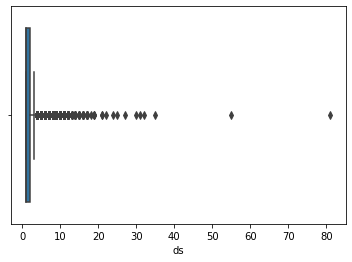

In [76]:
sns.boxplot(x=searchsess_per_user)

In [77]:
len(searchsess_per_user[searchsess_per_user > 3])*100/len(searchsess_per_user)

10.378930395055093

Looking at above, there are several outliers such as a user that attempted 81 search sessions. Additionally, we can see that only 10.37% of the users conducted more than 3 search sessions.

Therefore we could focus on data with search below or equal to 3 search sessions. 

C:\Users\bnriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ds'>

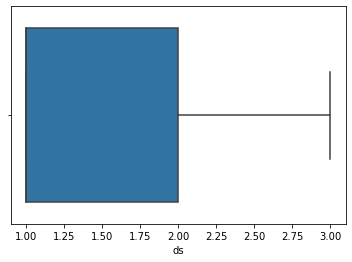

In [78]:
sns.boxplot(searchsess_per_user[searchsess_per_user <= 3])

<AxesSubplot:xlabel='ds', ylabel='Count'>

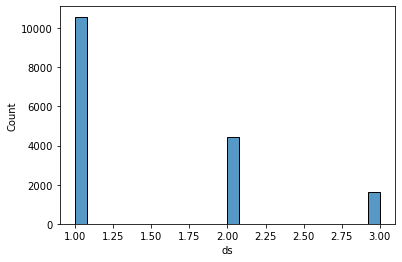

In [79]:
sns.histplot(searchsess_per_user[searchsess_per_user <= 3])

In [80]:
#Number of users
df_searches.id_user.nunique()

18605

From above, we found out that around 1000 users, which is more than 50% of the users actually only do 1 search attempts. Therefore it is very crucial to provide them the correct supply of accomodation to increase the conversion rate

Within one search session/set, users conducted multiple individual search in which they might changed any search parameter. Therefore, we can analyse the number of individual searches within a search session/set through the 'n_searches' variable.

In [81]:
df_searches.n_searches.max()

448

<AxesSubplot:xlabel='n_searches', ylabel='Count'>

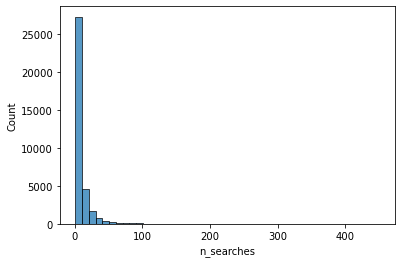

In [82]:
sns.histplot(data=df_searches.n_searches, binwidth=10)

<AxesSubplot:>

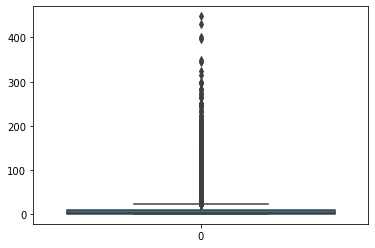

In [83]:
sns.boxplot(data=df_searches.n_searches)

In [84]:
df_searches.n_searches.describe()

count    35737.000000
mean         9.206565
std         17.348746
min          1.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        448.000000
Name: n_searches, dtype: float64

We can see that the average number of searches in one search session is 10. However, as we look at the histogram and boxplot, this is might be because of the effect of the outliers. 

In [85]:
df_searches[df_searches.n_searches > 100]

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
1234,2014-10-02,be1ec4d4-7f5a-40ef-ac78-ccea9868bc55,NaT,NaT,150,NaN,1,1,IE,NaN,NaN,<NA>,<NA>
1953,2014-10-03,d1bc0c45-dfbc-4f65-937c-9a950b3735ff,NaT,NaT,102,NaN,1,1,GB,NaN,NaN,<NA>,<NA>
2108,2014-10-04,0d2f5ae1-a490-4f38-acfb-f809b3a68015,NaT,NaT,122,NaN,1,1,IE,0.0,8.600000e+01,",Private room",<NA>
2154,2014-10-04,1e6ecbf6-e2d9-4bbc-841a-49958019b764,NaT,NaT,112,NaN,1,1,IE,NaN,NaN,<NA>,<NA>
2254,2014-10-04,4a1f0c72-7149-41c0-a655-e60c56cd4155,NaT,NaT,233,NaN,1,1,IL,0.0,3.800000e+01,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35378,2014-10-13,7b72c33b-9f95-40d9-a19b-bf4b3a5bcc26,2014-11-26,2014-11-28,106,2.0,1,10,DE,0.0,1.096000e+03,",Entire home/apt,Entire home/apt,Private room,...",<NA>
35388,2014-10-12,bd34054e-737f-46e6-80fa-cd9ea5e750c7,2014-12-12,2014-12-14,107,2.0,1,10,FR,NaN,NaN,",Entire home/apt,Entire home/apt,Private room,...",<NA>
35516,2014-10-10,73c59c7d-7a94-458c-a8e3-ba34a79df679,2014-10-17,2014-10-20,120,3.0,1,11,IT,0.0,1.073742e+09,",Entire home/apt,Private room,Private room,Sha...",<NA>
35518,2014-10-13,8ebde6fc-430a-4784-9f5c-adfa1cc0c402,2014-10-24,2014-11-01,139,8.0,1,11,FR,0.0,1.073742e+09,",Entire home/apt,Entire home/apt,Private room",",City Centre,City Centre,Ranelagh and Rathmine..."


In [86]:
len(df_searches[df_searches.n_searches > 20])*100/len(df_searches)

10.647228362761284

We can see that only 10% of the data has number of search more than 20.

Therefore, let's see the characteristic of the data with number of search less or equal than 20. 

<AxesSubplot:>

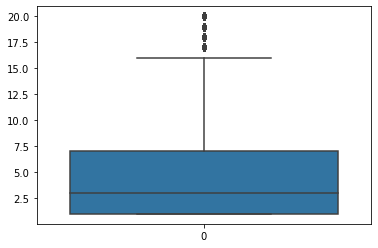

In [87]:
sns.boxplot(data=df_searches.n_searches[df_searches.n_searches <= 20])

<AxesSubplot:xlabel='n_searches', ylabel='Count'>

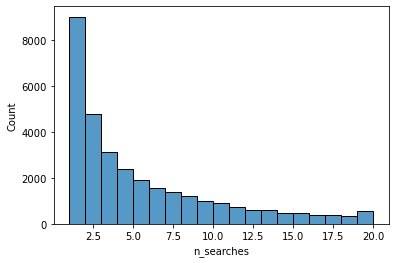

In [88]:
sns.histplot(data=df_searches.n_searches[df_searches.n_searches <= 20], binwidth = 1)

Apparently the average number of search within one session is around 2.5 and the most frequent number of search is 1. The dataset is positively skewed

<h4> 2. When did the users search for accomodation? When do the users want to check in?

In [89]:
df_searches.ds.min()

Timestamp('2014-10-01 00:00:00')

In [90]:
df_searches.ds.max()

Timestamp('2014-10-14 00:00:00')

<AxesSubplot:xlabel='ds', ylabel='Count'>

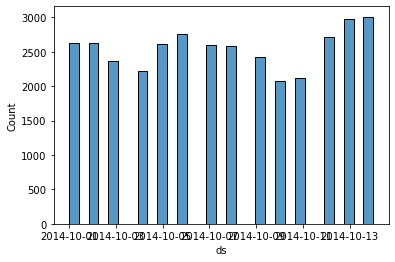

In [91]:
sns.histplot(df_searches.ds)

The number of searches between 01 October 2014 and 14 October 2014 were constant.

In [92]:
df_searches["n_days_before"] = (df_searches["ds_checkin"] - df_searches["ds"])

In [93]:
df_searches["n_days_before"].describe()

count                         23888
mean     51 days 08:11:53.730743469
std      65 days 18:56:19.491940518
min               -1 days +00:00:00
25%                10 days 00:00:00
50%                26 days 00:00:00
75%                67 days 00:00:00
max               604 days 00:00:00
Name: n_days_before, dtype: object

On average users tend to look for accomodation around 51 days before their check in date.

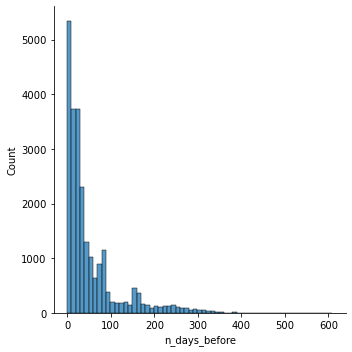

In [94]:
sns.displot(x = df_searches["n_days_before"].dt.days, binwidth=10)

In [95]:
df_searches["n_days_before"].mode()

0   1 days
dtype: timedelta64[ns]

In [96]:
len(df_searches[df_searches["n_days_before"].dt.days > 100])*100/len(df_searches)

9.396423874415872

Only 9.39% of data are above 100 days. Therefore, we can focus on data that has below or equal to 100 days before check-in

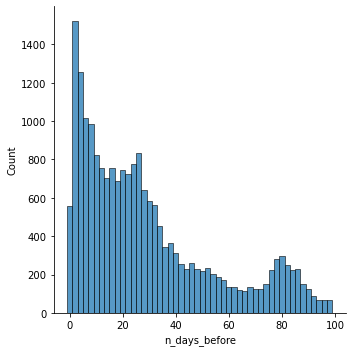

In [97]:
sns.displot(x = df_searches["n_days_before"][df_searches["n_days_before"].dt.days < 100].dt.days, binwidth=2)

However, as you can see most of the number of people are booking 3-4 days before their checkin date. We need to be careful in interpreting this. Because the reason might not be that the users need the accomodation the day after but they might be just looking around and do not have check-in date in mind yet

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

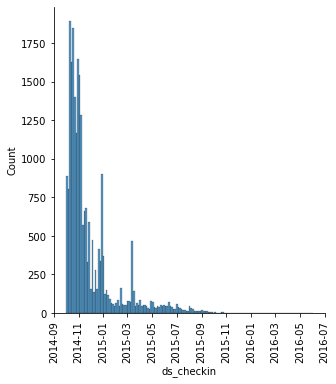

In [98]:
ax = sns.displot(data=df_searches, x = 'ds_checkin')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

Users are looking for end of year vacation and also around March next year

<h4> 3. How many nights the users want to stay?

In [99]:
df_searches["n_nights"].describe()

count    23888.000000
mean         7.672765
std         21.557614
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        399.000000
Name: n_nights, dtype: float64

In [100]:
len(df_searches[df_searches["n_nights"] > 10])*100/len(df_searches)

7.521616252063687

Only 7.5 % of the data has number of nights above 10. Therefore, we can focus on the data that has less or equal to 10

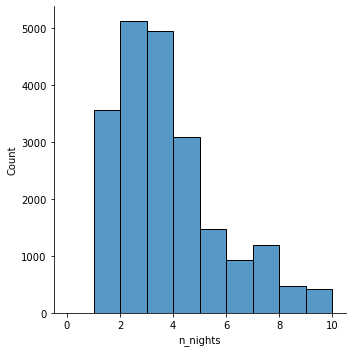

In [101]:
sns.displot(x = df_searches["n_nights"][df_searches["n_nights"] <= 10], binwidth=1)

<AxesSubplot:xlabel='n_nights'>

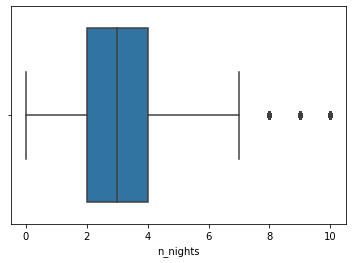

In [102]:
sns.boxplot(x = df_searches["n_nights"][df_searches["n_nights"] <= 10])

Users are looking to stay for 3 nights on average

<h4> 

<AxesSubplot:xlabel='n_guests_min', ylabel='Count'>

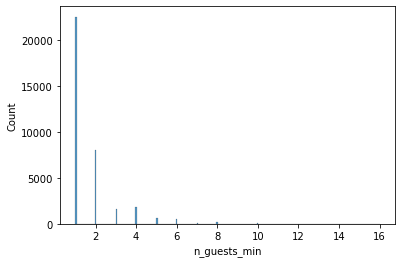

In [103]:
sns.histplot(df_searches.n_guests_min)

<AxesSubplot:xlabel='n_guests_max', ylabel='Count'>

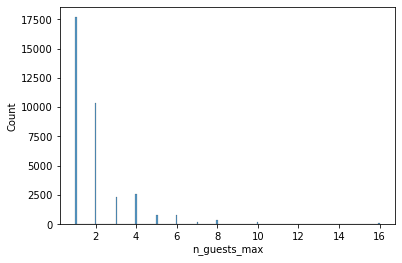

In [104]:
sns.histplot(df_searches.n_guests_max)

<h4> 5. Where are the users from?

In [105]:
df_searches['origin_country'].value_counts().head(10)

IE    6608
US    5811
GB    4832
FR    3444
IT    2333
DE    2170
ES    1759
CA    1085
AU     962
NL     843
Name: origin_country, dtype: Int64

The users are mostly European/Western countries with top 5 countries from Ireland, United States, Great Britain, France, and Italy

<h4> 6. How much are the users willing to pay?

C:\Users\bnriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='filter_price_max'>

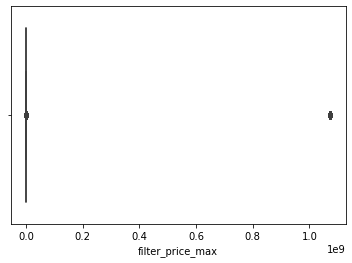

In [106]:
sns.boxplot(df_searches["filter_price_max"])

<AxesSubplot:xlabel='filter_price_min', ylabel='Count'>

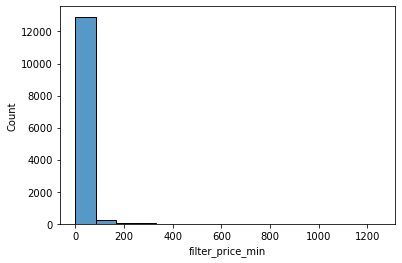

In [107]:
sns.histplot(df_searches["filter_price_min"])

From above, we can see that there are vey small number of search that uses max price more than 50,000,000

Therefore let's check the boxplot of searches with max price under than 50,000,000

In [108]:
df_searches_maxprice1 = df_searches[df_searches["filter_price_max"] < 50000000]

C:\Users\bnriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='filter_price_max'>

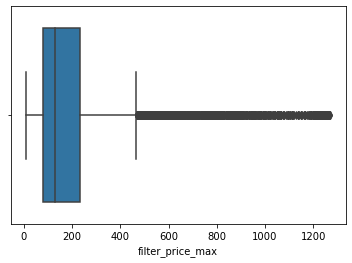

In [109]:
sns.boxplot(df_searches_maxprice1["filter_price_max"])

<AxesSubplot:xlabel='filter_price_max', ylabel='Count'>

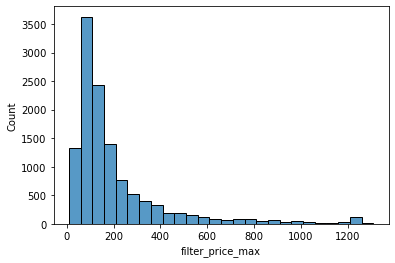

In [110]:
sns.histplot(data=df_searches_maxprice1["filter_price_max"], binwidth=50)

We can see that users are mostly looking for an accomodation between 50-75 usd/night

C:\Users\bnriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='filter_price_min'>

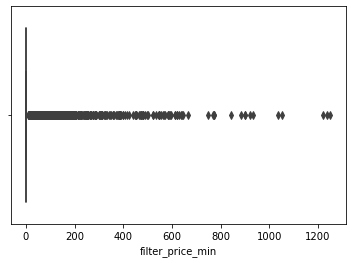

In [111]:
sns.boxplot(df_searches["filter_price_min"])

In [112]:
df_searches_minprice1 = df_searches[df_searches["filter_price_min"] < 700]

C:\Users\bnriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='filter_price_min'>

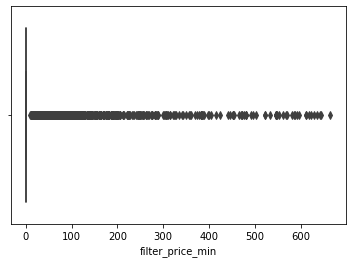

In [113]:
sns.boxplot(df_searches_minprice1["filter_price_min"])

In [114]:
len(df_searches[df_searches["filter_price_min"] > 1] )*100 / len(df_searches)

2.2329798248314074

We can see from above that only 2.2% of the data has price minimum set to 10 USD or above

Let's check how many searches use 0 as their minimum price

In [115]:
len(df_searches[df_searches["filter_price_min"] == 0] )*100 / len(df_searches)

35.044911436326494

35% of the searches using 0 as the minimum price

In [116]:
len(df_searches[df_searches["filter_price_min"].isna()])*100 / len(df_searches)

62.722108738842095

and 62% of the searches does not use any minimum price

Therefore, most of the users does not have any minimum requirement in term of budget but only maximum requirement

<h4> 7. What type of rooms the users are looking for?

Based on above, user wants to bring 1-2 guests with. Therefore they are looking for a smaller accomodation

In [117]:
df_searches["filter_room_types"].nunique()

160

There are 160 number of unique combinations of room types choices

In [118]:
df_searches["filter_room_types"].unique()

<StringArray>
[                                                                                                                         <NA>,
                                                                                                            ',Entire home/apt',
                                                                                                               ',Private room',
                                                                                  ',Entire home/apt,Private room,Private room',
                                                                                    'Entire home/apt,Private room,Shared room',
                                                                                                             'Entire home/apt',
                                                                  ',Entire home/apt,Entire home/apt,Private room,Private room',
                                                                                          

Based on above, we can see that there are this three options:

1. Entire home/apt
2. Private room
3. Shared room

Otherwise the users will leave the options empty

In [119]:
len(df_searches[df_searches["filter_room_types"].isna()])*100 / len(df_searches)

54.694014606710134

There are 54% searches that are without any room options. 

In [120]:
df_searches['entire_home_apt'] = df_searches['filter_room_types'].str.contains('Entire home/apt')

In [121]:
df_searches['entire_home_apt'].loc[df_searches['entire_home_apt'].isna()] = 0

In [122]:
df_searches['entire_home_apt']

0        False
1        False
2        False
3        False
4        False
         ...  
35732     True
35733    False
35734    False
35735    False
35736    False
Name: entire_home_apt, Length: 35737, dtype: boolean

In [123]:
df_searches['private_room'] = df_searches['filter_room_types'].str.contains('Private room')

In [124]:
df_searches['private_room'].loc[df_searches['private_room'].isna()] = 0

In [125]:
df_searches['private_room']

0        False
1        False
2        False
3        False
4        False
         ...  
35732    False
35733    False
35734    False
35735    False
35736    False
Name: private_room, Length: 35737, dtype: boolean

In [126]:
df_searches['shared_room'] = df_searches['filter_room_types'].str.contains('Shared room')

In [127]:
df_searches['shared_room'].loc[df_searches['shared_room'].isna()] = 0

In [128]:
df_searches['shared_room']

0        False
1        False
2        False
3        False
4        False
         ...  
35732    False
35733    False
35734    False
35735    False
35736    False
Name: shared_room, Length: 35737, dtype: boolean

In [129]:
df_searches['private_room'].sum()

5964

In [130]:
df_searches['shared_room'].sum()

949

In [131]:
df_searches['entire_home_apt'].sum()

12963

According to above analysis, most of the users want to have either an entire home, entire apartment, or a private room

<h4> 8. Which neighborhoods do the users want to stay in?

In [132]:
df_searches["filter_neighborhoods"].isna().sum()*100/len(df_searches)

96.23359543330442

96.23% of the searches did not contain any neighborhoods preferences.

In [133]:
df_searches['filter_neighborhoods'].value_counts().head(10)

,City Centre                                        719
,City Centre,Old City                                46
,Temple Bar                                          42
City Centre                                          33
,City Centre,Temple Bar                              29
,Ranelagh and Rathmines                              21
,Old City                                            18
,Ballsbridge                                         15
,City Centre,North City Central/O'Connell Street     12
,Docklands                                           11
Name: filter_neighborhoods, dtype: Int64

Out of the searches that do have neighborhoods preferences. Most of the users, prefer the city centre.

<h1> 4. Contacts Data

In this part, I will analyse the Contacts data 'df_contacts' and will do feature engineering work necessary. 

I will focus on analysing the factors that affects the hosts' decision to accept or reject the booking.

1. What is the overall rate of acceptance?
2. Does different number of guests have different acceptance rate?
3. Does different length of stay have different acceptance rate?
4. Does different price level have different acceptance rate?
5. Does different number of messages have different acceptance rate?
6. Does different user nationality have different acceptance rate?
7. Does bookings with different check-in dates have different acceptance rate?
 

To answer above questions, we need to do some feature engineering

In [134]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id_guest        7823 non-null   string             
 1   id_host         7823 non-null   string             
 2   id_listing      7823 non-null   string             
 3   ts_contact_at   7823 non-null   datetime64[ns, UTC]
 4   ts_reply_at     7219 non-null   datetime64[ns]     
 5   ts_accepted_at  3627 non-null   datetime64[ns]     
 6   ts_booking_at   2174 non-null   datetime64[ns]     
 7   ds_checkin      7823 non-null   datetime64[ns]     
 8   ds_checkout     7823 non-null   datetime64[ns]     
 9   n_guests        7823 non-null   Int64              
 10  n_messages      7823 non-null   Int64              
dtypes: Int64(2), datetime64[ns, UTC](1), datetime64[ns](5), string(3)
memory usage: 687.7 KB


<h4> 1. What is the number of accepted booking?

Let's create a column to see whether user's contacts converted into accepted or not

In [135]:
df_contacts.head(10)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,23439f9d-1bc3-4189-8c0a-4b803da3740a,1076c74d-ca8f-4381-856e-0ef45b9e1692,125ff7c3-e002-4e14-86c3-ce27af0e70b5,2014-10-07 21:17:39+00:00,2014-10-12 17:33:28,NaT,NaT,2014-11-10,2014-11-12,1,2
1,23439f9d-1bc3-4189-8c0a-4b803da3740a,4f351532-59dc-4706-898a-0c4d25f1b125,94c2dc52-f0f4-409c-9c3d-af36e152f9d9,2014-10-07 21:13:32+00:00,2014-10-07 21:23:58,NaT,NaT,2014-11-10,2014-11-12,1,2
2,23439f9d-1bc3-4189-8c0a-4b803da3740a,becd48ad-623e-4821-9538-e9d8f84f1cac,d6763e59-b5ea-406f-8fbb-4cf4d597f332,2014-10-07 21:02:46+00:00,2014-10-07 21:17:57,2014-10-13 21:06:33,2014-10-13 21:06:33,2014-11-10,2014-11-12,1,6
3,7629ea29-ff0a-429b-982f-39f4a0da6eb5,28980988-2a4e-4516-bf62-5c47b3ba62b2,2a6efb76-ce28-4811-8f01-b9cdc0be5f2a,2014-09-29 16:29:22+00:00,2014-09-29 18:25:11,2014-09-29 18:25:17,NaT,2014-11-10,2014-11-30,1,5
4,8eed188c-02d7-455d-9c90-aba0f391d8d2,8ccb3e6b-7b90-4de7-ac10-1e8f35824d23,09d5efd5-381b-460c-8df2-47e9a4d9c5dd,2014-10-04 15:46:14+00:00,2014-10-04 15:52:49,2014-10-04 15:52:49,2014-10-05 05:01:41,2014-11-10,2014-11-13,1,19
5,97276eb6-a988-46c9-9c62-2cd2be97fad4,882d1e82-a229-470b-ac01-2e417e7f2daa,8f1c98b8-0f35-4258-8dc7-3743106a4455,2014-10-16 21:46:38+00:00,2014-10-17 01:04:31,NaT,NaT,2014-11-10,2014-11-12,1,4
6,9f8eebb9-95e9-493b-b6df-b75e531b7876,cb6e8d00-6a32-4ade-bd12-3e6dce9784f3,487a7671-c5d4-467d-bdb4-797f31980a2b,2014-10-12 12:29:09+00:00,2014-10-12 17:24:17,2014-10-12 17:24:17,2014-10-14 11:27:16,2014-11-10,2014-12-19,1,8
7,b5674966-7390-460f-8dde-c615b8783062,a83f92fb-fcbf-445b-8cb5-516560f50601,746c951e-6861-4b8b-9ee5-1c4fdabec2f8,2014-10-13 03:18:26+00:00,2014-10-13 04:12:59,2014-10-13 04:12:59,2014-10-13 04:12:59,2014-11-10,2014-11-12,1,26
8,02f0a750-34da-4268-94e8-f1a371f0460e,86b39b70-965b-479d-a0b0-719b195acea2,e5dd99cd-ad45-409b-ac13-ab9a576a41a3,2014-10-09 10:10:42+00:00,2014-10-11 10:07:50,2014-10-11 20:51:12,NaT,2014-11-11,2014-11-19,1,9
9,289f6109-a24b-4880-a6bf-1f3f5e9d551a,6535d260-8062-4089-bc27-8fdf2bcbfb63,98edd793-0138-4853-989e-7d8497cefc60,2014-10-10 17:26:34+00:00,2014-10-10 23:12:34,2014-10-10 23:12:40,2014-10-10 23:12:40,2014-11-11,2014-11-16,1,12


We can see from the data with index 3 and 5 that there is a timestamp for the accepted date but not booking date.
Therefore, it is better to use conversion rate from 'contact' to 'accepted' rather than from 'booking' to 'accepted'. I assume that those who contacted the users were booking the accomodation

In [136]:
df_contacts['accepted'] = np.where(np.isnan(df_contacts['ts_accepted_at']), False, True)

In [137]:
len(df_contacts[df_contacts['accepted'] == True])/len(df_contacts)

0.46363287741275727

The overal booking conversion rate is 46%, which means 46% of the booking are accepted by the hosts

<h4> 2. Does different number of guests have different acceptance rate?

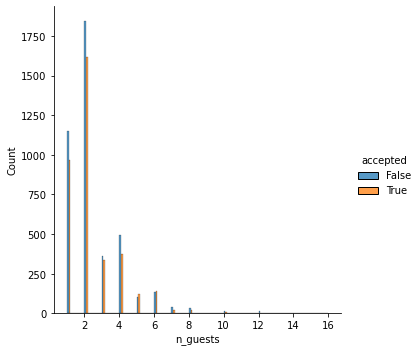

In [138]:
sns.displot(df_contacts, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

In [139]:
len(df_contacts[df_contacts['n_guests'] > 9])*100/len(df_contacts)

0.7158379138437939

Because only 0.7% of the data that has number of guests more than 9, then we can 

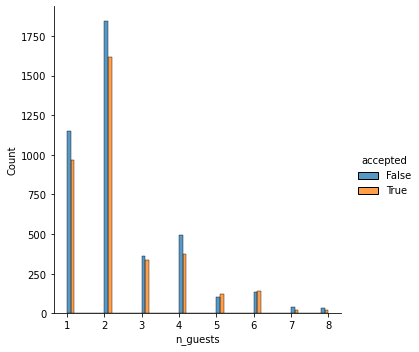

In [140]:
#Number of guests stayed

df_contacts_less8 = df_contacts[df_contacts['n_guests'] <= 8]
sns.displot(df_contacts_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

The ratio between accepted and rejected bookings are similar for different numbers of guests

However, in term of absolute values, there are a lot bookings with 1 to 2 guests being rejected. Therefore, it is possible to assume that Airbnb need more supply for smaller rooms

<h4> 3. Does different length of stay have different acceptance rate?

In [141]:
df_contacts['stay_length'] = (df_contacts['ds_checkout'] - df_contacts['ds_checkin']).dt.days

In [142]:
len(df_contacts[df_contacts['stay_length'] > 10])*100/len(df_contacts)

7.912565511951937

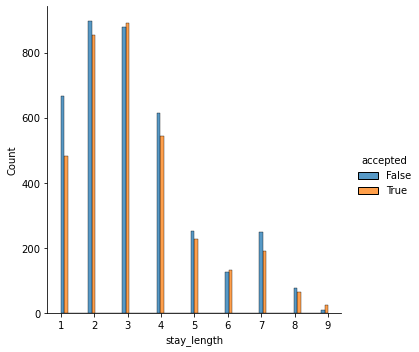

In [143]:
df_contacts_less9 = df_contacts[df_contacts['stay_length'] <= 9]
sns.displot(df_contacts_less9, x = 'stay_length', hue = 'accepted', multiple="dodge")
plt.show()

The ratio between accepted and rejected bookings are similar for different numbers of guests except for length of stay of 1 night. It is possible to assume that most of the hosts prefer that the guests stay for more than one night.

<h4> 4. Does different price level have different acceptance rate?

Because we know that the minimum price filter data is not really informative, let's use the maximum price filter data. 

First, we need to merge the datasets

In [144]:
df_merge = df_contacts.merge(df_searches, left_on='id_guest', right_on='id_user')

In [148]:
len(df_merge[df_merge["filter_price_max"] > 500])*100/len(df_merge)

7.369638351555929

As only 7.3% of the data are with maximum price above 500. Therefore, we will focus on the data with less than 500 USD

In [149]:
df_merge_less500 = df_merge[df_merge["filter_price_max"] < 500]

In [153]:
df_merge_less500["accepted"]

0        False
2        False
3        False
4        False
5        False
         ...  
28443    False
28475     True
28484     True
28485     True
28500    False
Name: accepted, Length: 12009, dtype: bool

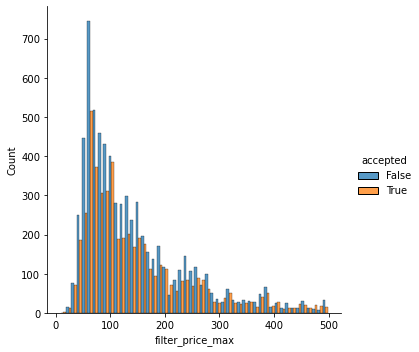

In [157]:
sns.displot(df_merge_less500, x = "filter_price_max", hue = 'accepted', multiple="dodge")

We can take a closer look by categorizing the maximum price and calculating the acceptance rate for each categories

In [162]:
def cat_price (df):
    if (df['filter_price_max'] >= 0) & (df['filter_price_max'] < 100):
        return '0-100'
    
    elif (df['filter_price_max'] >= 100) & (df['filter_price_max'] < 200):
        return '100-200'

    elif (df['filter_price_max'] >= 200) & (df['filter_price_max'] < 300):
        return '200-300'
    
    elif (df['filter_price_max'] >= 300) & (df['filter_price_max'] < 400):
        return '300-400'

    elif (df['filter_price_max'] >= 400) & (df['filter_price_max'] < 500):
        return '400-500'

    else:
        return '500+'

In [163]:
df_merge['max_price_category'] = df_merge.apply(lambda df: cat_price(df), axis=1)

In [164]:
df_merge.groupby('max_price_category').agg({'accepted': 'mean'})

,accepted
max_price_category,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500+,0.432928


From above, we can see that the acceptance rate for each price level are similar which around 40-50%

<h4> 5. Does different number of messages have different acceptance rate?

In [165]:
len(df_contacts[df_contacts['n_messages'] > 10])*100/len(df_contacts)

16.144701521155568

Let's focus on number of messages equal or less than 10 since only 16.1% of data has number of messages above 10

In [167]:
df_contacts_less10 = df_contacts[df_contacts["n_messages"] < 10]

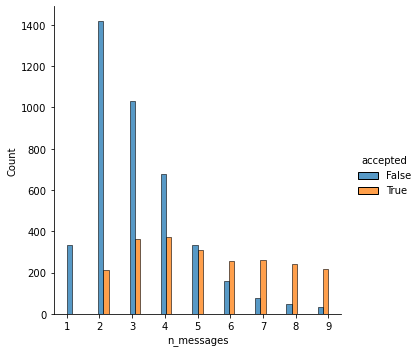

In [169]:
sns.displot(df_contacts_less10, x = "n_messages", hue = 'accepted', multiple="dodge")

It seems that the more number of messages being sent, the more likely for the booking to be accepted. However this needs to be analysed further as it is possible that this is caused by the more popular accomodations having a lot of message requests and were not able answer back and accept the bookings of the users

<h4> 6. Does users with different nationality have different acceptance rate?

In [199]:
df_country = df_merge[['origin_country', 'accepted']]

In [200]:
df_country

,origin_country,accepted
0,IE,False
1,IE,False
2,IE,False
3,IE,False
4,IE,False
...,...,...
28531,KR,True
28532,GB,False
28533,GB,False
28534,GB,False


In [201]:
accepted_count = df_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})

In [202]:
accepted_count.columns = ['count_accepted']

In [203]:
accepted_count

count_accepted
origin_country accepted                
AE             False                 95
               True                  59
AR             False                 32
               True                  21
AT             False                156
...                                 ...
US             False               2248
               True                2050
UZ             True                   6
ZA             False                 29
               True                  24

[131 rows x 1 columns]

In [204]:
acceptance_country = pd.merge(df_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count

In [205]:
acceptance_country = acceptance_country.drop_duplicates()

In [206]:
acceptance_country

,origin_country,accepted,count_accepted
0,IE,False,1734
42,IE,True,1217
252,FR,True,1526
253,US,True,2050
259,FR,False,1706
...,...,...,...
24065,KY,False,5
24564,BH,False,1
25984,SI,False,4
26823,EE,True,2


In [207]:
#Find the total bookings per country
country_count = df_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

In [208]:
country_count

,count_country
origin_country,
AE,154
AR,53
AT,239
AU,590
BB,3
...,...
TW,59
UA,57
US,4298


In [209]:
acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country'])
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

In [210]:
acceptance_country

,origin_country,accepted,count_accepted,count_country
3,US,True,2050,4298
11,GB,True,1610,3667
2,FR,True,1526,3232
5,IT,True,1183,3137
1,IE,True,1217,2951
...,...,...,...,...
92,LS,True,2,2
129,EE,True,2,2
66,ET,True,1,1
86,RE,True,1,1


Let's focus on the country that has more than 100 bookings

In [211]:
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] 

In [212]:
acceptance_country

,origin_country,accepted,count_accepted,count_country
3,US,True,2050,4298
11,GB,True,1610,3667
2,FR,True,1526,3232
5,IT,True,1183,3137
1,IE,True,1217,2951
25,ES,True,794,1914
8,DE,True,745,1535
32,CA,True,407,993
35,IN,True,138,874
19,AU,True,268,590


Let's calculate the acceptance rate

In [213]:
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

<ipython-input-213-d1161f449359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']


,origin_country,accepted,count_accepted,count_country,acceptance_rate
35,IN,True,138,874,0.157895
52,HR,True,159,530,0.300000
68,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
5,IT,True,1183,3137,0.377112
60,AE,True,59,154,0.383117
32,CA,True,407,993,0.409869
1,IE,True,1217,2951,0.412403
25,ES,True,794,1914,0.414838
82,RO,True,50,118,0.423729


The acceptance rate are fairly similar for the users from different countries, which is around 40-50 percent. However users from India has lower acceptance rate which is around 15%. It is important to do a further deep dive because it might be caused by booking accomodation during peak dates, the number of guests, or other factors.